# Brownian motion

Een van de bekendste voorbeelden van botsende deeltjes in de natuur is Brownian motion.
Fijn gemalen pollen in water lijken te dansen in willekeurige richting.
Dit komt doordat de pollen worden geraakt door watermoleculen die in alle richtingen bewegen.
Omdat de pollen veel zwaarder zijn dan watermoleculen, dus de beweging van de pollen is veel langzamer en minder "intens" dan die van de watermoleculen.
Dit proces van willekeurige beweging door botsingen met kleinere deeltjes wordt Brownian motion genoemd en kunnen we simuleren op basis van ons (premature) botsingsmodel.
Daarbij kunnen we ook gebruik maken van de zojuist geleerde manier van tracking van deeltjes, waarbij we een zowel het zware bolletjes als een enkel deeltje kunnen volgen.

Let op!
We bestuderen hier nog geen thermische effecten, deze opdrachten zijn met name bedoeld om beter te begrijpen hoe het botsingsmodel in elkaar zit.

```{warning}
In dit notebook zitten delen waar ruimte is om code toe te voegen, maar waarbij je denkt... waarom dan?
In een latere opdracht moet je terug naar die cell en de juiste code toevoegen.
```

In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [81]:
# Maken van de ParticleClass

class ParticleClass:
    # Het maken van het deeltje
    def __init__(self, m, v, r, R, c):
        self.m = m                         
        self.v = np.array(v, dtype=float)  
        self.r = np.array(r, dtype=float)  
        self.R = np.array(R, dtype=float)  
        self.c = c

    # Het updaten van de positie, eventueel met zwaartekracht
    def update_position(self):
        self.r += self.v * dt + 1/2 * -9.812 * dt**2  
              
    # Harde wand
    def boxcollision(self):
        if abs(self.r[0]) + self.R > Box_length: 
            self.v[0] = -self.v[0]                                  # Omdraaien van de snelheid
            self.r[0] = np.sign(self.r[0]) * (Box_length - self.R)  # Zet terug net binnen box                 
        if abs(self.r[1]) + self.R > Box_length: 
            self.v[1] = -self.v[1]     
            self.r[1] = np.sign(self.r[1]) * (Box_length - self.R) 
            
    @property
    def momentum(self):
        return self.m * self.v
    
    @property
    def kin_energy(self):
        return 1/2 * self.m * np.dot(self.v, self.v)

In [82]:
# Aanmaken van de randvoorwaarden en initiele condities
Box_size_0 = 10
Box_length_0 = Box_size_0/2
Box_length = Box_length_0     # De grootte van de box kan wijzigen!

# Particles
dt = 0.1
particles = []
N = 40
v_0 = 1

dt = 0.04

# Aanmaken van deeltjes
for i in range(N-1):
    vx = np.random.uniform(-v_0,v_0)
    vy = np.random.choice([-1, 1])*np.sqrt(v_0**2-vx**2)        
    pos = Box_length_0*np.random.uniform(-1,1,2)
    particles.append(ParticleClass(m=1.0, v=[vx, vy], r = pos, R=.5,c='blue')) 

particles.append(ParticleClass(m=20.0, v=[0, 0], r = [0, 0], R=.5,c='red')) 


```{exercise} Brownian motion
:label: ex-brownian-1

Leg uit wat er in de laatste regel van bovenstaande script gebeurt.
Voeg voor deze regel goede metadata toe.
```

```{solution} ex-brownian-1
first a particle class was made to define a particle with direction and velocity and radius. Then a function was made to make the particle move in the animation with speed and soon gravity (acceleration). Next a loop within a function was made to make sure that the particle stays in the box, so changes speed in the opposite direction when it approaches the x or y limit of the graph. Then we gave the particle momentum and kinetic energy. In the next box of code we created 40 particles with a change in time of .1/0.04, and an initial velocity of 1. then a loop was made for every particle starting at number 40 theres a change in velocity both in the x and y direction inside the created box. theres red and blue particles. 
```

Er is een doos vol met deeltjes op willekeurige positie aangemaakt.
We willen kijken waar de deeltjes zijn terechtgekomen.
Hieronder staat dit weergegeven. 



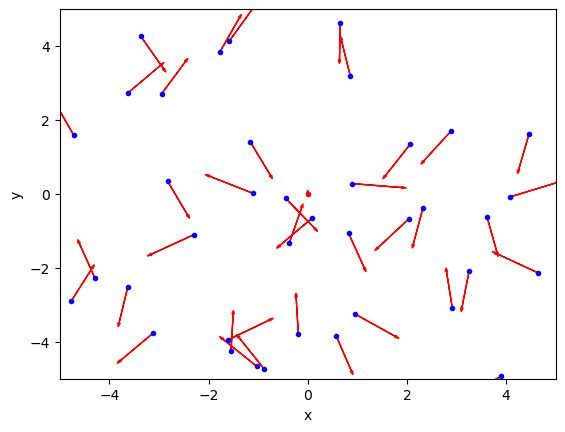

In [83]:
# Inspecteren van beginsituatie
plt.figure()

plt.xlabel('x')
plt.ylabel('y')

plt.xlim(-Box_length_0,Box_length_0)
plt.ylim(-Box_length_0,Box_length_0)


for particle, particle_object in enumerate(particles):
    plt.plot(particle_object.r[0],particle_object.r[1],color=particle_object.c,marker='.')
    plt.arrow(particle_object.r[0],particle_object.r[1], 
               particle_object.v[0],particle_object.v[1], 
               head_width=0.05, head_length=0.1, color='red')
plt.show()


```{exercise} 
:label: ex-brownian-2

Er staat ook code met comments ervoor, wat doet deze code? 
Check je antwoord door de comments weg te halen.
Hoe wordt er voor gezorgd dat de snelheid van elk deeltje gelijk is?
```

```{solution} ex-brownian-2
de snelheid van elk deeltje is niet gelijk omdat the pijlen die van de deeltjes af komen zijn verschillende lengtes. 
```

We gaan nu de functies van de simulatie weer aanroepen:

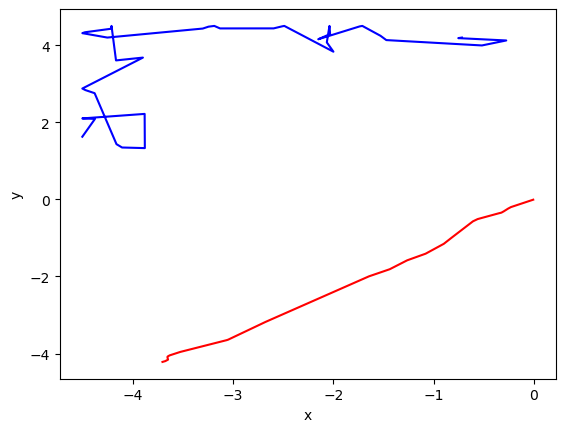

In [84]:
#tracken van zware particle
track_x = []
track_y = []
#tracken van lichte particle
track_x2 = []
track_y2 = []

# collision count tracking
collision_count = 0
collision_history = []

#defining a function to count the amount of collions
def handle_collisions(particles):
    #"""Return number of particle-particle collisions in this timestep"""
    num_particles = len(particles)
    count = 0
    for i in range(num_particles):
        for j in range(i+1, num_particles):
            if collide_detection(particles[i], particles[j]):
                particle_collision(particles[i], particles[j])
                count += 1
    return count

#loop to update position and count the collisions
for i in range(400):
    for p in particles:
        p.update_position()
        p.boxcollision()
    
    c = handle_collisions(particles)
    collision_count += c
    collision_history.append(collision_count)

# track particle positions
    track_x.append(particles[N-1].r[0])  #zware particle
    track_y.append(particles[N-1].r[1])
    track_x2.append(particles[0].r[0])    #lichte particle
    track_y2.append(particles[0].r[1])

# plotting particle paths

plt.figure()
plt.plot(track_x, track_y, 'r')
plt.plot(track_x2, track_y2, 'b')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In onderstaande code geven we de code voor de simulatie en volgen we de positie van het zware deeltje. 

```{exercise} Brownian motion in beeld
:label: ex-brownian-3
- Draai de onderstaande simulatie een keer en bestudeer de output.
- Voeg zelf een tweede tracking toe van een licht deeltje en verbeter de plot.
- Wat zijn overeenkomsten en verschillen tussen de beweging van de twee deeltjes?
- Wat valt je op als je de simulatie een aantal keer runt?
```

```{solution} ex-brownian-3
that its not a smooth line, and changes everytime the code is rerun. 
```

We zouden gevoel willen krijgen voor het aantal botsingen dat per tijdseenheid plaatsvindt. 
Elke keer dat er een botsing plaatsvindt, zou de counter met 1 omhoog moeten gaan.
Idealiter wordt het aantal botsingen opgeslagen in een array zodat je het aantal botsingen als functie van de tijd kunt weergeven.

```{exercise}
Pas bovenstaand idee toe in de eerder gemaakte code.
Plot hieronder het aantal botsingen als functie van de tijd.
```

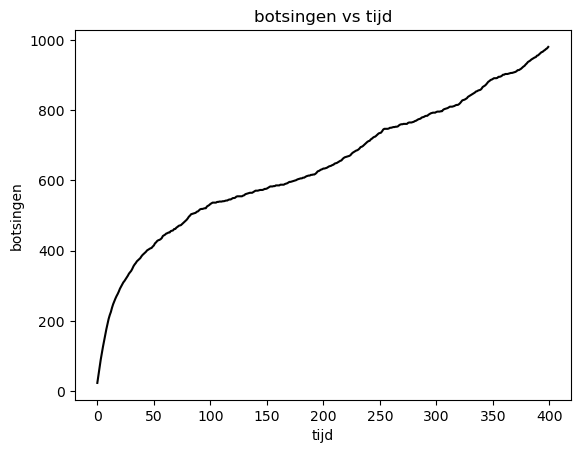

In [85]:
#plotting the collision count vs time. 

plt.plot(collision_history, 'k')
plt.xlabel('tijd')
plt.ylabel('botsingen')
plt.title('botsingen vs tijd')
plt.show()

```{warning} 🌶 Let op!
:icon: false
De onderstaande opdrachten vallen buiten de stof maar tellen mee als je excellent wilt behalen.
```

In zulke fysica modellen is de afgelegde weg (afstand tussen begin en eindpunt) van belang.
Deze afgelegde weg zegt iets over de snelheid van difussie.
Idealiter bekijken we een histogram.
Maar voor een histogram hebben we veel deeltjes nodig.



```{exercise} Afgelegde weg 🌶
:label: ex-brownian-4

- Maak een simulatie met 361 deeltjes, waarvan 1 zwaar deeltje.
- Houd rekening met de boxgrootte, deze moet mee schalen!
- Maak een histogram van de afgelegde weg voor alle deeltjes. 
- Geef de afgelegde weg van het grote deeltje duidelijk aan.
```


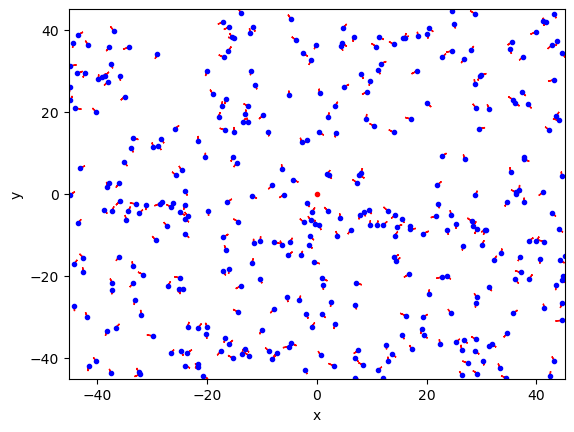

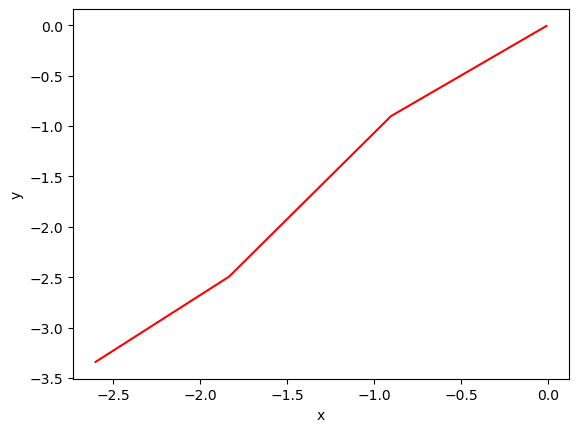

In [86]:
#your code/answer

# Aanmaken van de randvoorwaarden en initiele condities
Box_size_0 = 90.25
Box_length_0 = Box_size_0/2
Box_length = Box_length_0     # De grootte van de box kan wijzigen!

# Particles
dt = 0.1
particles = []
N = 361
v_0 = 1

dt = 0.04

# Aanmaken van deeltjes
for i in range(N-1):
    vx = np.random.uniform(-v_0,v_0)
    vy = np.random.choice([-1, 1])*np.sqrt(v_0**2-vx**2)        
    pos = Box_length_0*np.random.uniform(-1,1,2)
    particles.append(ParticleClass(m=1.0, v=[vx, vy], r = pos, R=.5,c='blue')) 

particles.append(ParticleClass(m=20.0, v=[0, 0], r = [0, 0], R=.5,c='red')) 

# Inspecteren van beginsituatie
plt.figure()

plt.xlabel('x')
plt.ylabel('y')

plt.xlim(-Box_length_0,Box_length_0)
plt.ylim(-Box_length_0,Box_length_0)


for particle, particle_object in enumerate(particles):
    plt.plot(particle_object.r[0],particle_object.r[1],color=particle_object.c,marker='.')
    plt.arrow(particle_object.r[0],particle_object.r[1], 
               particle_object.v[0],particle_object.v[1], 
               head_width=0.05, head_length=0.1, color='red')
plt.show()

#tracken van zware particle
track_x = []
track_y = []
#tracken van lichte particle
track_x2 = []
track_y2 = []

# collision count tracking
collision_count = 0
collision_history = []

#defining a function to count the amount of collions
def handle_collisions(particles):
    #"""Return number of particle-particle collisions in this timestep"""
    num_particles = len(particles)
    count = 0
    for i in range(num_particles):
        for j in range(i+1, num_particles):
            if collide_detection(particles[i], particles[j]):
                particle_collision(particles[i], particles[j])
                count += 1
    return count

#loop to update position and count the collisions
for i in range(400):
    for p in particles:
        p.update_position()
        p.boxcollision()
    
    c = handle_collisions(particles)
    collision_count += c
    collision_history.append(collision_count)

# track particle positions
    track_x.append(particles[N-1].r[0])  #zware particle
    track_y.append(particles[N-1].r[1])
    track_x2.append(particles[0].r[0])    #lichte particle
    track_y2.append(particles[0].r[1])

# plotting particle paths

plt.figure()
plt.plot(track_x, track_y, 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

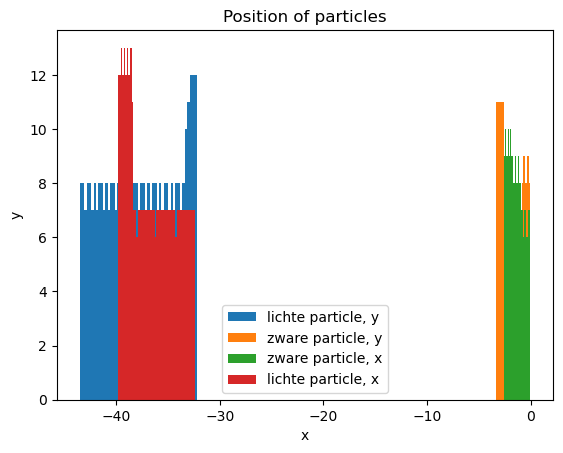

In [87]:
#plotting the routes of the particles in a histogram

plt.hist(track_y2, bins=50, label='lichte particle, y')
plt.hist(track_y, bins=50, label='zware particle, y')
plt.hist(track_x, bins=50, label='zware particle, x')
plt.hist(track_x2, bins=50, label='lichte particle, x')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Position of particles')
plt.legend()
plt.show()


En nu we toch bezig zijn met twee verschillende deeltjes.... 

We kunnen twee "groepen" van deeltjes aanmaken, elk  met een andere massa. Als we dan de zwaartekracht aan zetten, dan zouden we verwachten dat de lichtere deeltjes boven komen "drijven".

```{exercise} Onderzoek dit vermoeden 🌶
- maak daartoe de box 2x zo hoog als breed
- verdubbel het totaal aantal deeltjes
- zet een artificieel grote zwaartekracht aan
```

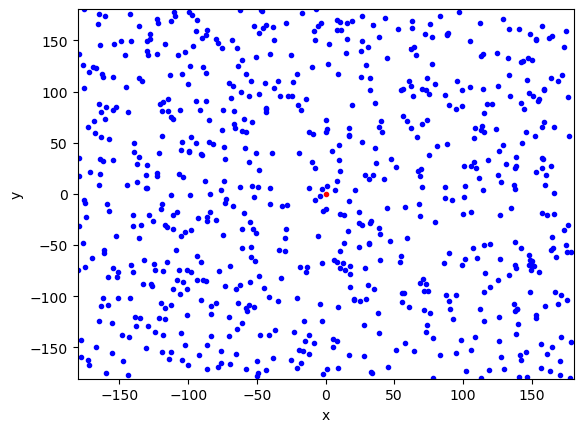

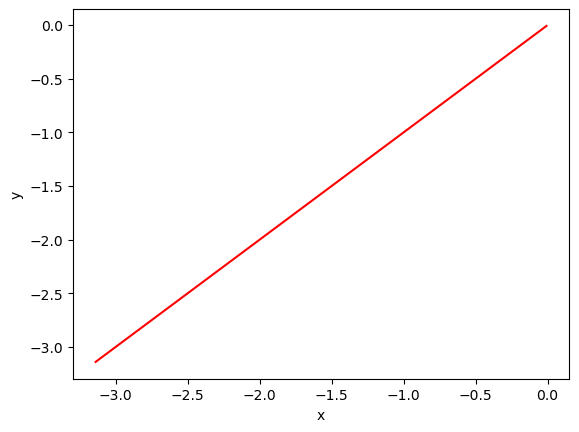

In [89]:
#your code/answer

# Aanmaken van de randvoorwaarden en initiele condities
Box_size_0 = 90.25
Box_length_0 = Box_size_0*2
Box_length = Box_length_0     # De grootte van de box kan wijzigen!

# Particles
dt = 0.1
particles = []
N = 361*2
v_0 = 1

dt = 0.04

# Aanmaken van deeltjes
for i in range(N-1):
    vx = np.random.uniform(-v_0,v_0)
    vy = np.random.choice([-1, 1])*np.sqrt(v_0**2-vx**2)        
    pos = Box_length_0*np.random.uniform(-1,1,2)
    particles.append(ParticleClass(m=1.0, v=[vx, vy], r = pos, R=.5,c='blue')) 

particles.append(ParticleClass(m=20.0, v=[0, 0], r = [0, 0], R=.5,c='red')) 

# Inspecteren van beginsituatie
plt.figure()

plt.xlabel('x')
plt.ylabel('y')

plt.xlim(-Box_length_0,Box_length_0)
plt.ylim(-Box_length_0,Box_length_0)


for particle, particle_object in enumerate(particles):
    plt.plot(particle_object.r[0],particle_object.r[1],color=particle_object.c,marker='.')
    plt.arrow(particle_object.r[0],particle_object.r[1], 
               particle_object.v[0],particle_object.v[1], 
               head_width=0.05, head_length=0.1, color='red')
plt.show()

#tracken van zware particle
track_x = []
track_y = []
#tracken van lichte particle
track_x2 = []
track_y2 = []

# collision count tracking
collision_count = 0
collision_history = []

#defining a function to count the amount of collions
def handle_collisions(particles):
    #"""Return number of particle-particle collisions in this timestep"""
    num_particles = len(particles)
    count = 0
    for i in range(num_particles):
        for j in range(i+1, num_particles):
            if collide_detection(particles[i], particles[j]):
                particle_collision(particles[i], particles[j])
                count += 1
    return count

#loop to update position and count the collisions
for i in range(400):
    for p in particles:
        p.update_position()
        p.boxcollision()
    
    c = handle_collisions(particles)
    collision_count += c
    collision_history.append(collision_count)

# track particle positions
    track_x.append(particles[N-1].r[0])  #zware particle
    track_y.append(particles[N-1].r[1])
    track_x2.append(particles[0].r[0])    #lichte particle
    track_y2.append(particles[0].r[1])

# plotting particle paths

plt.figure()
plt.plot(track_x, track_y, 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
